In [1]:
#initialize libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile

In [4]:
#configure parameters
plt.rcParams["figure.figsize"] = (14, 4)

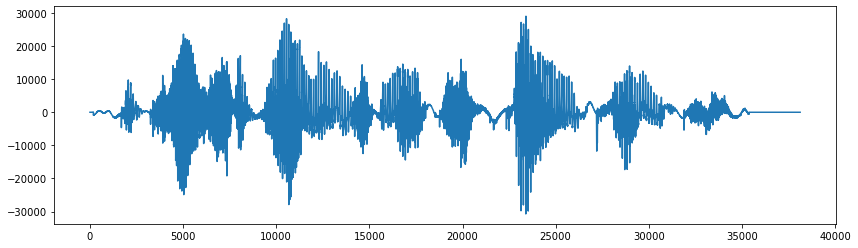

In [6]:
#load wav file
rate, s = wavfile.read('speech.wav')
plt.plot(s);
IPython.display.Audio(s, rate=rate)

In [7]:
#largest element in magnitude
norm = 1.0 / max(np.absolute([min(s), max(s)]))
sA = 100.0 * s * norm
#digital version clamped
sD = np.round(sA)

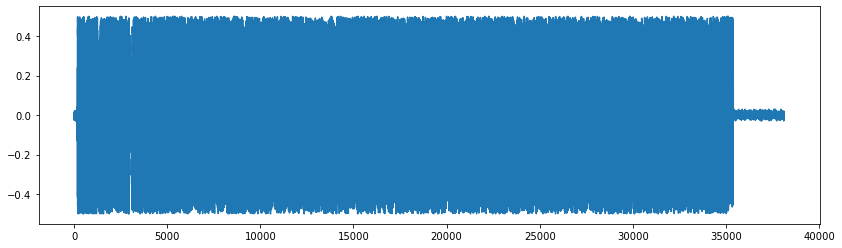

In [8]:
#plot error
plt.plot(sA - sD);

In [9]:
#function to calculate signal noise ratio
def SNR(noisy, original):
    err = np.linalg.norm(original - noisy)
    sig = np.linalg.norm(original)
    return (10 * np.log10(sig/err))
print("SNR = %f dB" % SNR(sD, sA))

SNR = 17.124344 dB


In [11]:
IPython.display.Audio(sA, rate=rate)

In [12]:
#One can actually hear the slight the 17dB difference between the analog and digital signals
IPython.display.Audio(sD, rate=rate)

## Transmission

In [13]:
def repeater(x, noise_amplitude, attenuation):
    #create noise
    noise = np.random.uniform(-noise_amplitude, noise_amplitude, len(x))
    #attenuation
    x = x * attenuation
    #noise
    x = x + noise
    #gain compensation
    return x/attenuation

In [15]:
def analog_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = repeater(x, noise_amplitude, attenuation)
    return x

In [16]:
def digital_tx(x, num_repeaters, noise_amplitude, attenuation):
    for n in range(0, num_repeaters):
        x = np.round(repeater(x, noise_amplitude, attenuation))
    return x

In [20]:
NUM_REPEATERS = 80
NOISE_AMPLITUDE = 0.2
ATTENUATION = 0.5
yA = analog_tx(sA, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Analog trasmission: SNR = %f dB' % SNR(yA, sA))    

yD = digital_tx(sD, NUM_REPEATERS, NOISE_AMPLITUDE, ATTENUATION)
print ('Digital trasmission: SNR = %f dB' % SNR(yD, sA))

Analog trasmission: SNR = 8.455189 dB
Digital trasmission: SNR = 17.124344 dB


In [21]:
IPython.display.Audio(yA, rate=rate)

In [22]:
IPython.display.Audio(yD, rate=rate)